In [122]:
data = {
    "Main current - Arc.csv": {
        "title": "Natężenie prądowe dla sekwencji kolorów przy 77 LED",
        "xlabel": "Czas [s]",
        "ylabel": "Natężenie [A]",
    },
    "Main voltage - Arc.csv": {
        "title": "Napięcie prądowe dla sekwencji kolorów przy 77 LED",
        "xlabel": "Czas [s]",
        "ylabel": "Napięcie [V]",
    },
    "Main energy - Arc.csv": {
        "title": "Zużyta energia dla sekwencji kolorów przy 77 LED",
        "xlabel": "Czas [s]",
        "ylabel": "Moc [W]",
    },
}

In [123]:
import pandas as pd
from pandas import DataFrame


def read_from_csv(file_path: str, /, *, header=0, show=False) -> DataFrame:
    df = pd.read_csv(file_path, header=header)
    if show:
        display(df)
    return df

,Timestamp,Value
0,0.00000,2.167561
1,0.00025,2.167561
2,0.00050,2.167561
3,0.00075,2.167561
4,0.00100,2.167643
...,...,...
235427,58.85675,3.355341
235428,58.85700,3.355013
235429,58.85725,3.355013
235430,58.85750,3.355013


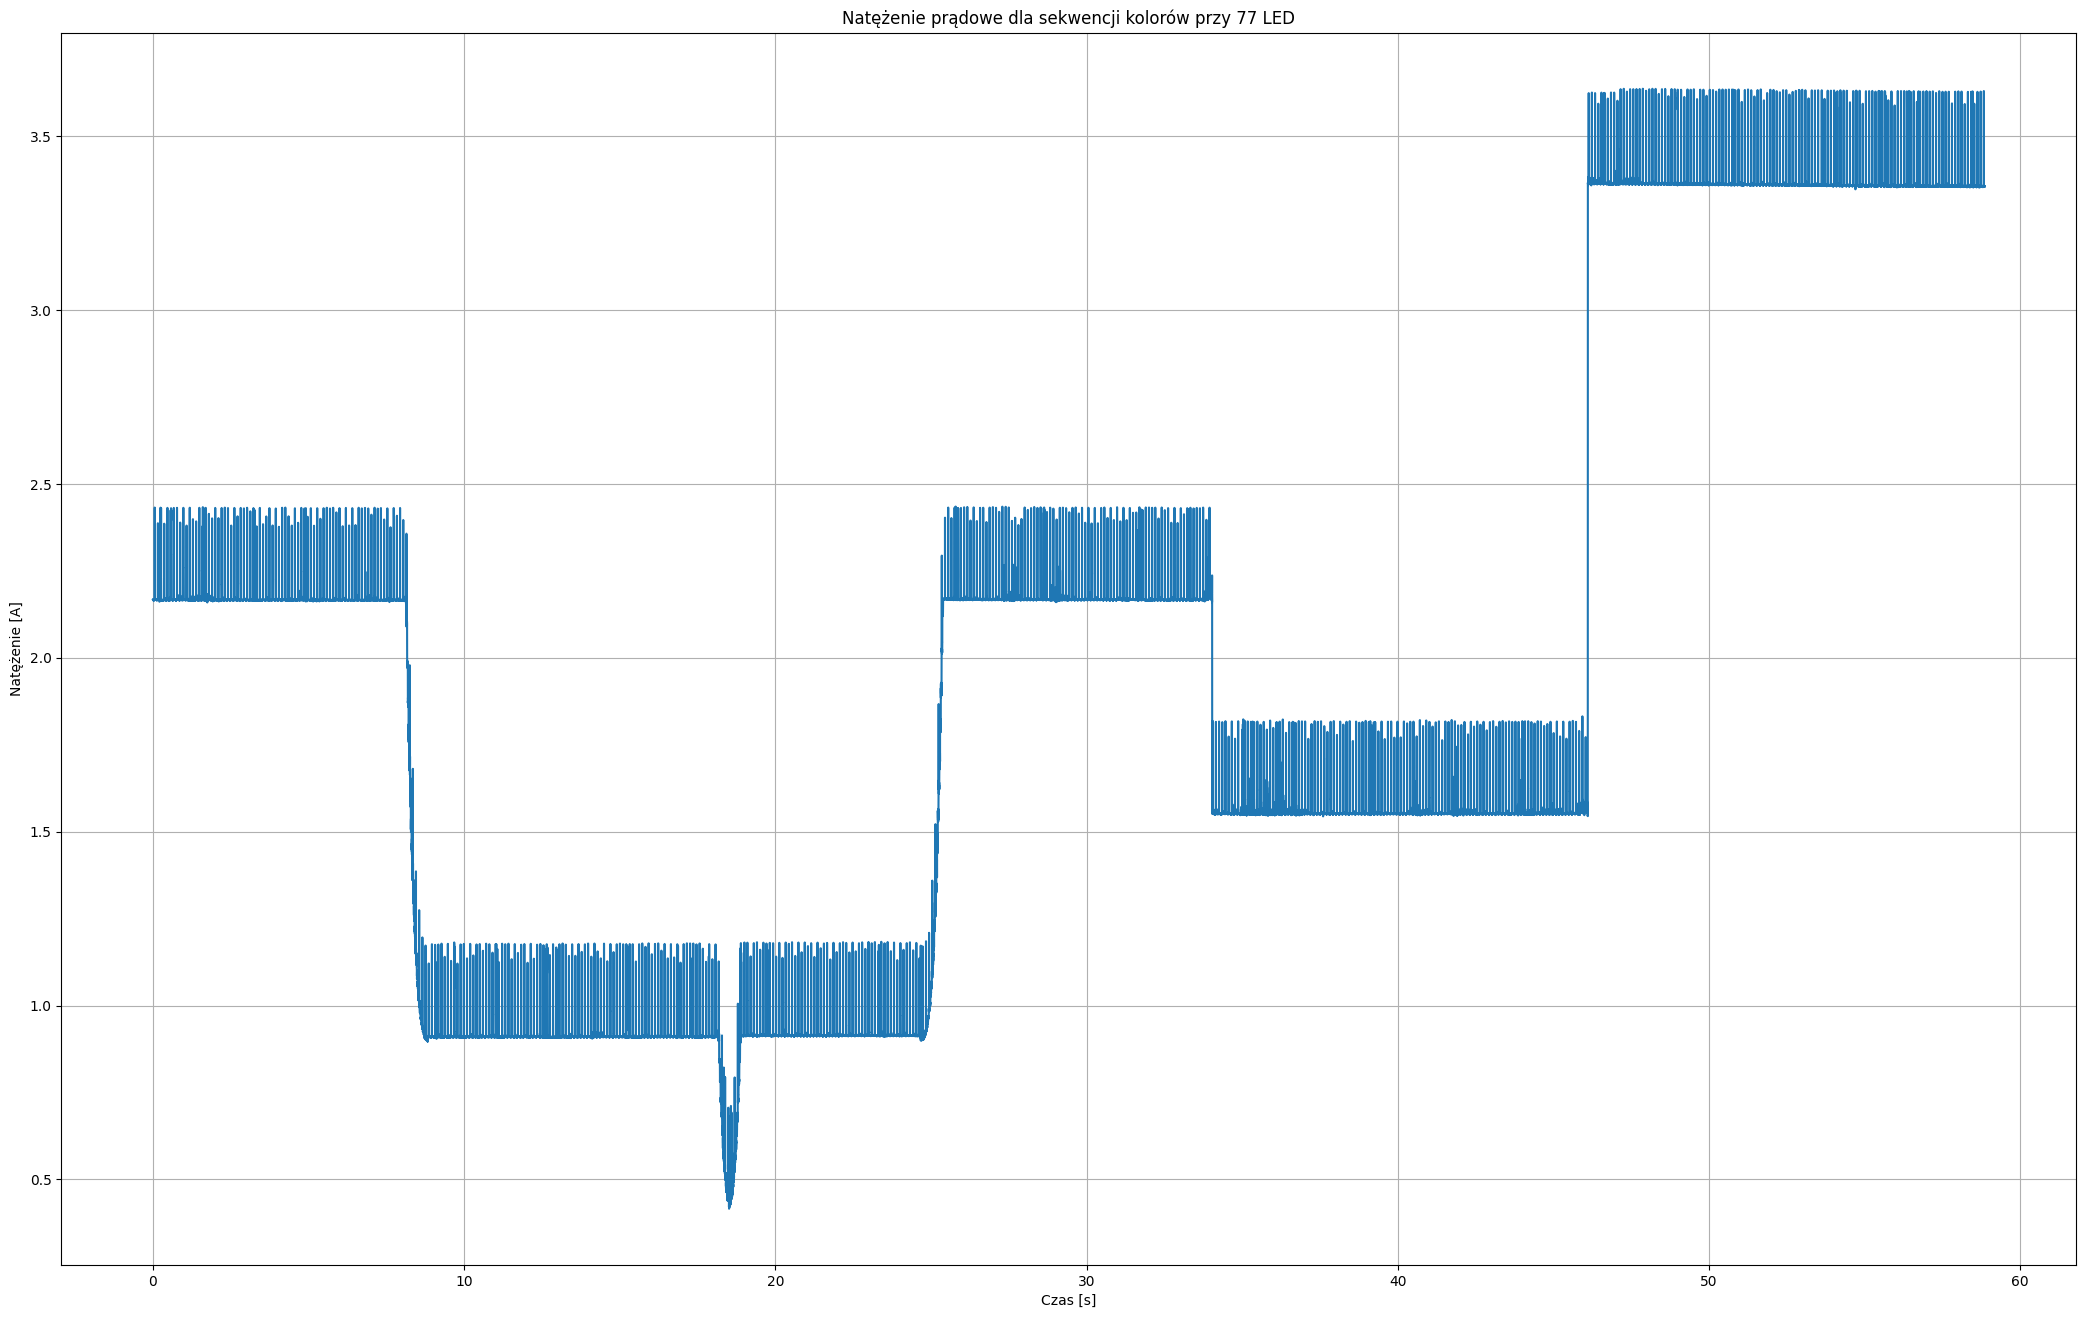

,Timestamp,Value
0,0.000,4.592
1,0.001,4.592
2,0.002,4.592
3,0.003,4.592
4,0.004,4.592
...,...,...
58853,58.853,4.614
58854,58.854,4.615
58855,58.855,4.615
58856,58.856,4.615


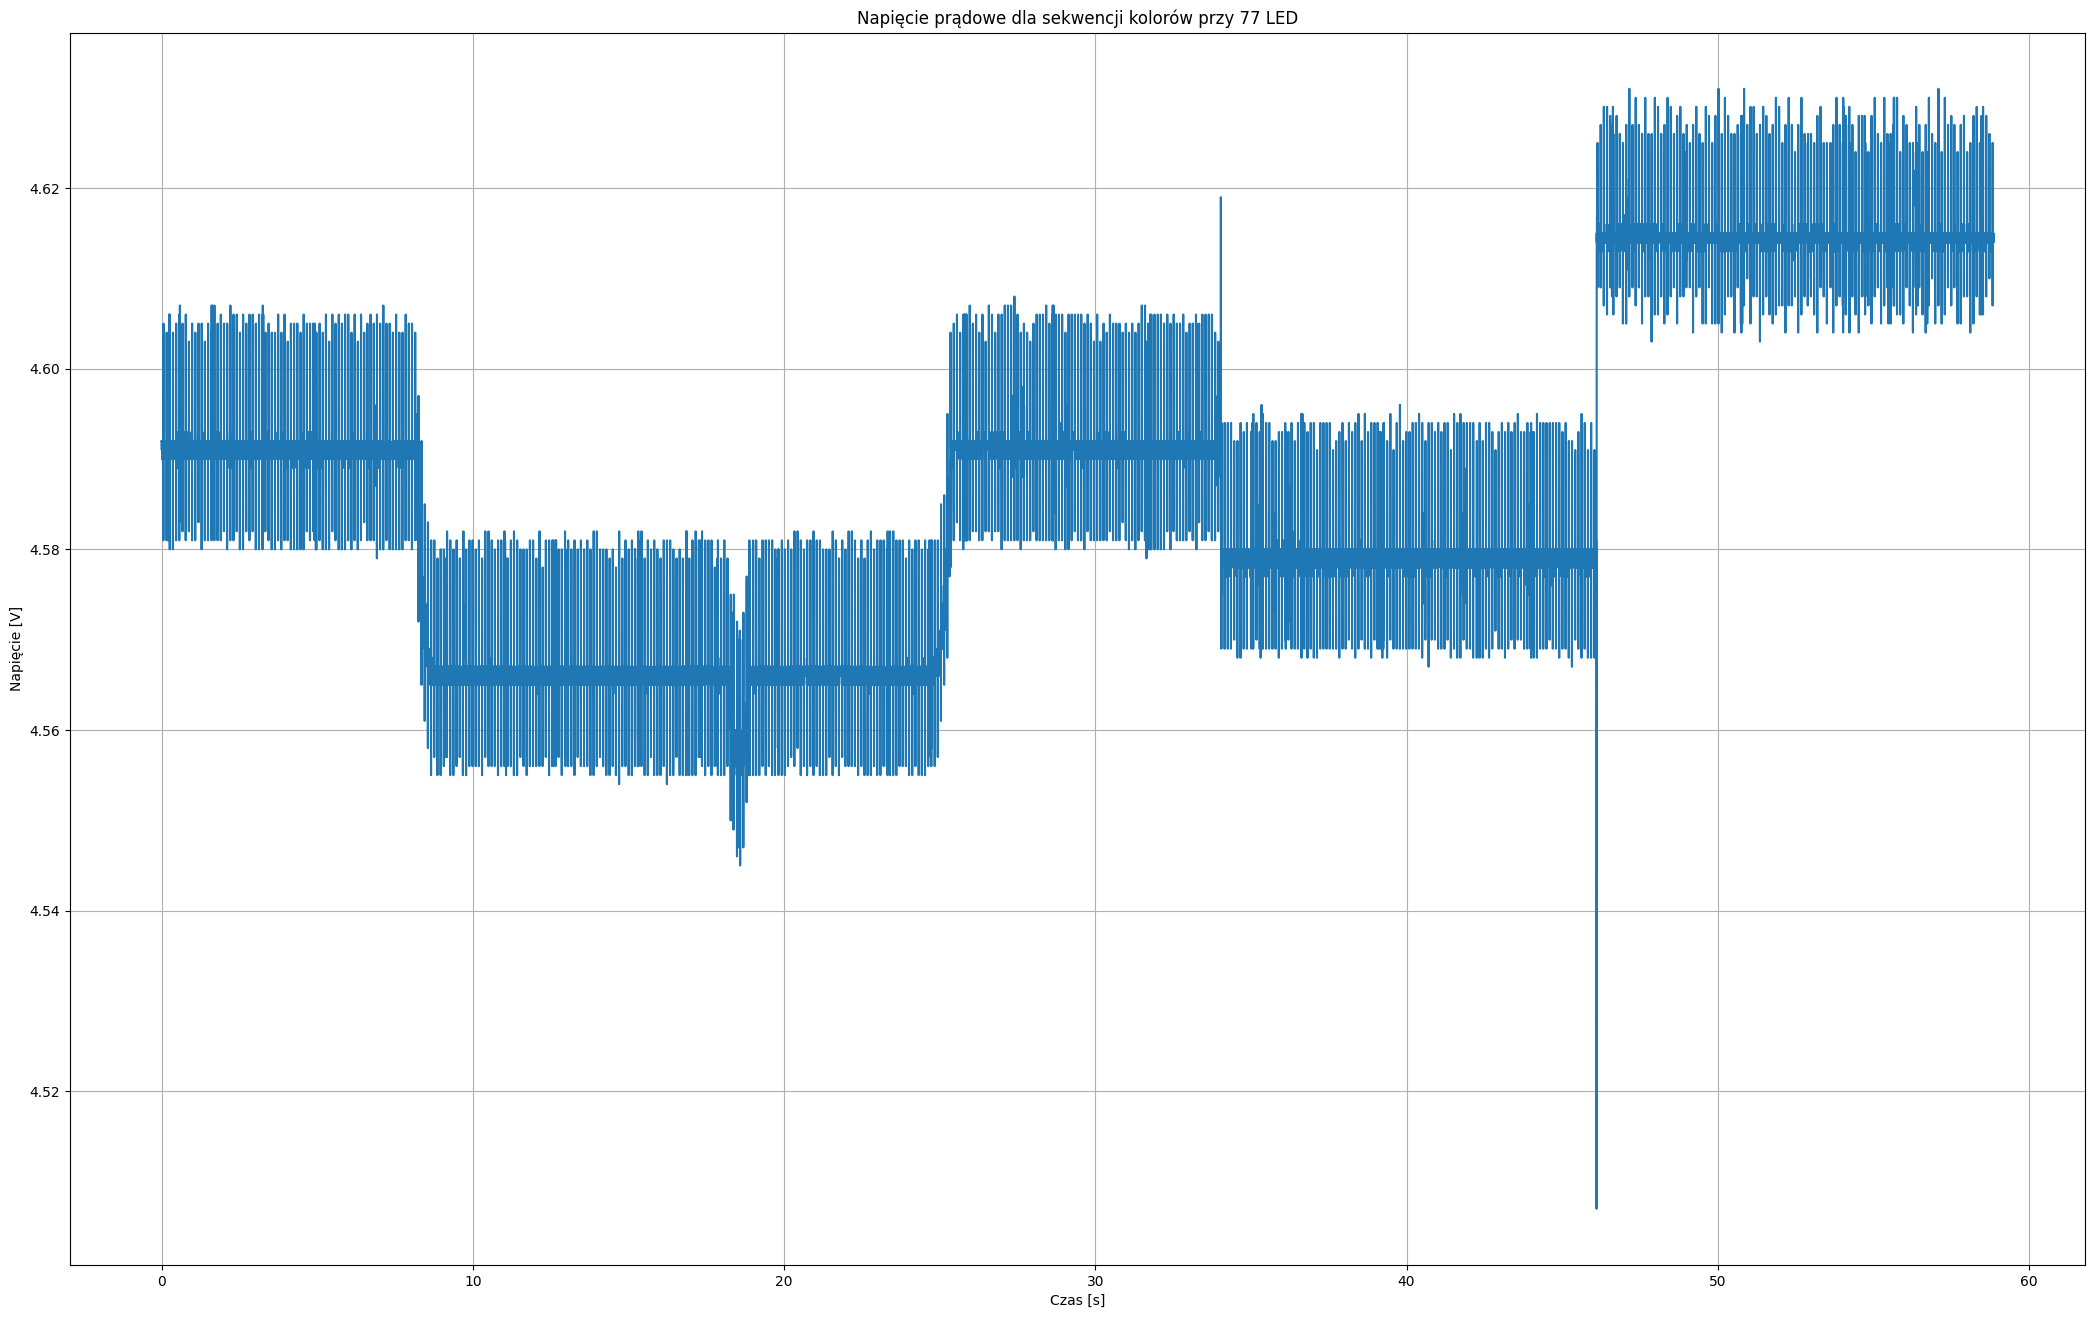

,Timestamp,Value
0,0.00000,0.000000e+00
1,0.00025,6.912112e-07
2,0.00050,1.382422e-06
3,0.00075,2.073633e-06
4,0.00100,2.764845e-06
...,...,...
235428,58.85700,1.458722e-01
235429,58.85725,1.458733e-01
235430,58.85750,1.458744e-01
235431,58.85775,1.458755e-01


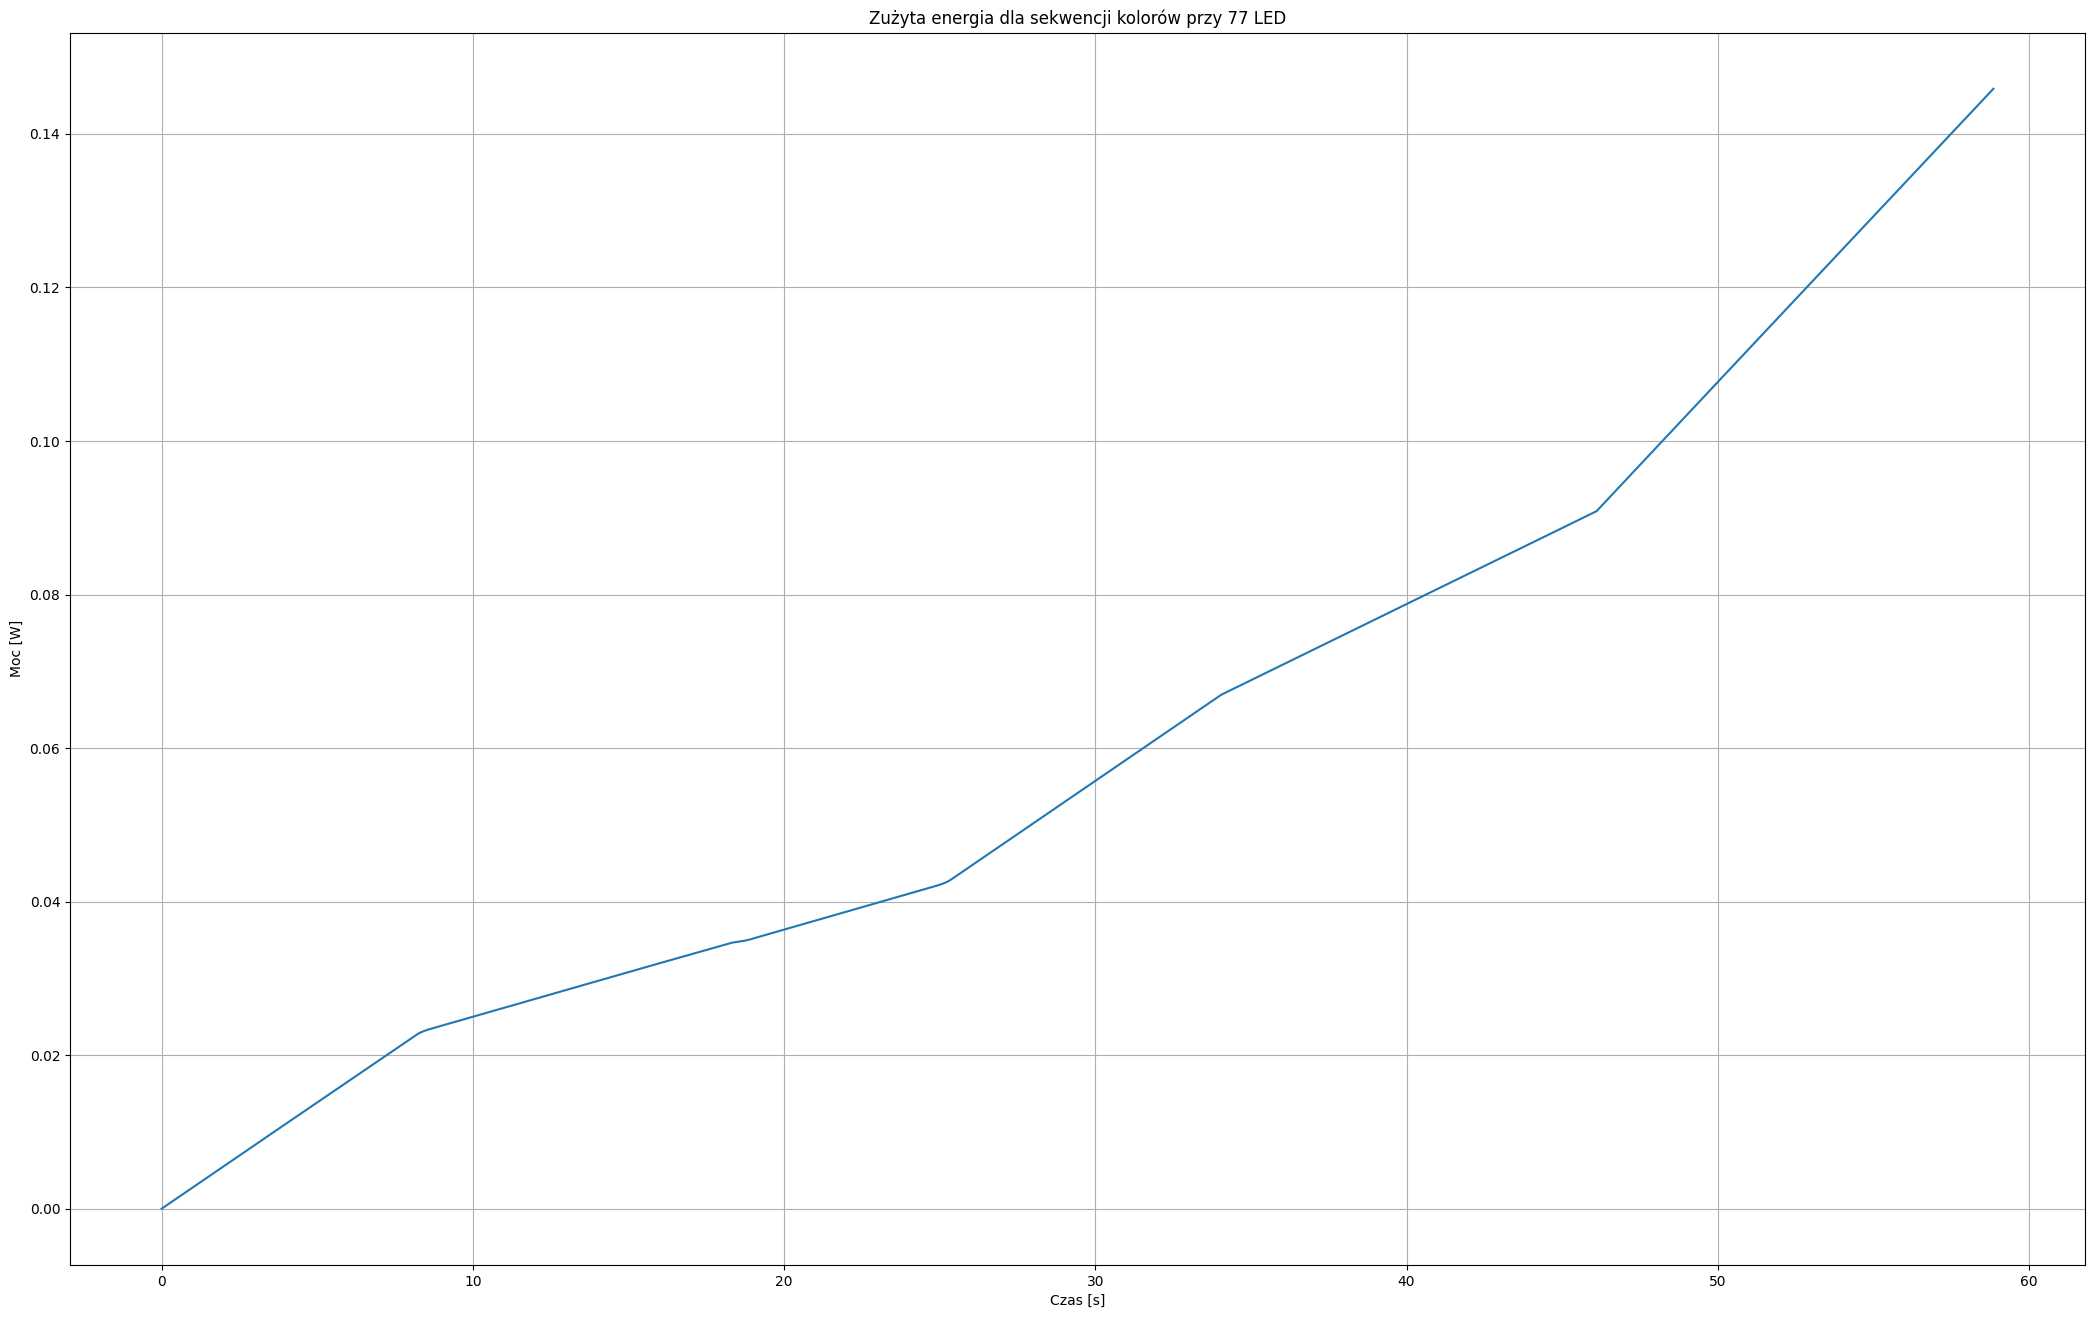

In [124]:
import matplotlib.pyplot as plt
import os


def plot_data(
    xdata=None,
    ydata=None,
    /,
    *,
    xlabel: str = "",
    ylabel: str = "",
    title: str = "",
    grid=False,
    save: str = "",
) -> None:
    fig = plt.figure(figsize=(26, 16))
    plt.plot(xdata, ydata)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    if grid:
        plt.grid()
    if save:
        plt.savefig(f"{save}.png", format="png", dpi=800, bbox_inches="tight")

    plt.show()

df_all = None

for file, params in data.items():
    df = read_from_csv(file, show=True)
    time, value = df.columns[:2]
    df.rename(columns={value: params["ylabel"]}, inplace=True)
    df_all = df if df_all is None else df_all.merge(df, on=time)
    title = os.path.splitext(file)[0]

    plot_data(
        df[time],
        df[params["ylabel"]],
        xlabel=params["xlabel"],
        ylabel=params["ylabel"],
        title=params["title"],
        grid=True,
        save=title,
    )

In [130]:
time, current, voltage, power, *headers = list(df_all.columns)
current_ESP32 = 0.1463
power_77_LED = '77 LED [W]'
power_all_LED = '144 LED [W]'
ESPy_Lumi = 'ESPy-Lumi [W]'
df_all[power_77_LED] = (df_all[current] - current_ESP32) * df_all[voltage]
df_all.sort_values(by=[power_77_LED, time], ascending=[False, True], inplace=True)

df_top = df_all.head(23).copy()
df_top.loc[:, power_all_LED] = df_top[power_77_LED] * 2
df_top.loc[:, ESPy_Lumi] = df_top[power_all_LED] * 2 + (current_ESP32 * df_top[voltage])

display(df_top)

,Timestamp,Natężenie [A],Napięcie [V],Moc [W],77 LED [W],144 LED [W],ESPy-Lumi [W]
47158,47.158,3.635299,4.615000,0.095398,16.101729,32.203459,65.082092
47669,47.669,3.635709,4.613000,0.097605,16.096644,32.193287,65.061456
48796,48.796,3.635709,4.613000,0.102470,16.096644,32.193287,65.061456
48488,48.488,3.635299,4.613000,0.101141,16.094752,32.189504,65.053890
50024,50.024,3.633657,4.615001,0.107773,16.094155,32.188310,65.051795
48079,48.079,3.635052,4.613000,0.099375,16.093613,32.187225,65.049332
49309,49.309,3.634560,4.613000,0.104687,16.091344,32.182687,65.040256
47260,47.260,3.636447,4.610000,0.095838,16.089578,32.179156,65.032755
48996,48.996,3.629227,4.619000,0.103335,16.087641,32.175282,65.026324
50331,50.331,3.634396,4.612000,0.109098,16.087099,32.174198,65.023132
